In [5]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia

In [6]:
v_df = pd.read_csv('pioneer10_ephemeris_3mon.txt', skiprows = 35, skipfooter=400-349, engine='python') # df of info about pioneer's position
s_df = pd.DataFrame(columns = ['source_id', 'g_abs', 'bp_rp', 'parallax', 'dist']) # df of info about stars

print(v_df)

                   date na1 na2         ra       dec  Unnamed: 5
0     1972-Mar-24 00:00          246.62028 -30.67989         NaN
1     1972-Jun-24 00:00          231.22569 -23.00908         NaN
2     1972-Sep-24 00:00          256.77906 -24.71742         NaN
3     1972-Dec-24 00:00          290.37296 -23.36830         NaN
4     1973-Mar-24 00:00          316.56712 -17.83242         NaN
..                  ...  ..  ..        ...       ...         ...
307   2048-Dec-24 00:00           80.23882  26.12428         NaN
308   2049-Mar-24 00:00           79.99606  26.09142         NaN
309   2049-Jun-24 00:00           80.38231  26.10305         NaN
310   2049-Sep-24 00:00           80.64617  26.13581         NaN
311   2049-Dec-24 00:00           80.27969  26.12600         NaN

[312 rows x 6 columns]


In [ ]:
for i in range(len(v_df.index)):
    #query to cone search around given pioneer's position
    query = """SELECT source_id, phot_g_mean_mag+5*log10(ABS(parallax)/1000)+5 AS g_abs, bp_rp, parallax, abs(1000/parallax) AS dist
    FROM gaiaedr3.gaia_source
    WHERE 1=CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', """ + str(v_df['ra'][i]) + """,""" + str(v_df['dec'][i]) + """, 0.035603))
    """
    
    results = Gaia.launch_job_async(query).get_results() #results from gaia query
    results = results.to_pandas().dropna() #convert to pandas

    s_df = pd.concat([s_df, results], ignore_index = True)
    
s_df = s_df.drop_duplicates(subset=['source_id']) #only keep unique rows
print(s_df)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [4]:
s_df.to_csv('pioneer10_stars_3mon.csv') #save stars
s_df1 = s_df[s_df['dist'] <= 100]
s_df1.to_csv('pioneer10_stars_within100.csv')
print(s_df1)

                source_id      g_abs     bp_rp   parallax       dist
4138   147469115153030528   9.977690  2.725558  19.798918  50.507811
5240  3419918875386344576  12.564852  0.090281  10.215629  97.889220
6698  3420112385142481408   8.733228  2.244542  11.944325  83.721765
6705  3420112389433836544  10.095686  2.712812  11.952685  83.663209
7811  3420108541143263232  11.705020  3.123183  13.551446  73.792866
9312  3420851982801891456  15.385736  2.913109  13.333516  74.998972
9677  3420907469483342208  14.745964  3.470867  11.820108  84.601598
9800  3420850299174737664   5.254769  0.975718  15.014264  66.603333


<ipython-input-5-a7a09d32f750>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("hot"))
  color_map.set_bad(color='white') #set color as white for masked values


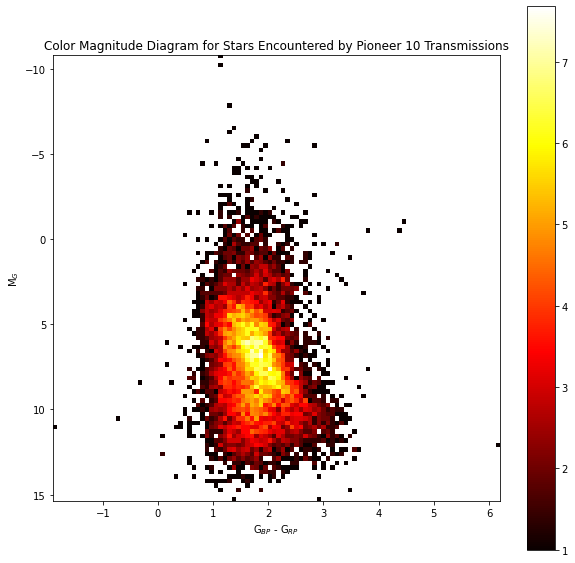

In [5]:
#build hr diagram
histogram, xedges, yedges = np.histogram2d(
   s_df['bp_rp'], s_df['g_abs'], bins=100)

histogram = np.ma.masked_where(histogram == 0.0, histogram) #map zero values
histogram = histogram.T #list bins with common y range

color_map = plt.cm.get_cmap("hot") #set colors for diagram
color_map.set_bad(color='white') #set color as white for masked values

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] #bounding box in data

#plotting

plt.figure(figsize=(10, 10))

#plt.savefig('gaia_100_parsecs.png')
plt.imshow(np.sqrt(histogram), origin='lower', cmap=color_map,
    extent=extent, aspect=(extent[1]-extent[0])/(extent[3]-extent[2])
    )

plt.colorbar()
plt.title("Color Magnitude Diagram for Stars Encountered by Pioneer 10 Transmissions")
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.savefig('pioneer10_stars_hr.png')

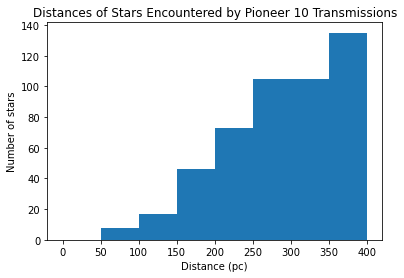

In [7]:
s_df = pd.read_csv('pioneer10_stars_3mon.csv') #get csv

plt.hist(abs(1000/s_df['parallax']), bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]) #plot parallax (mas) converted to distance (pc) in histogram

plt.title("Distances of Stars Encountered by Pioneer 10 Transmissions") #labels
plt.xlabel("Distance (pc)")
plt.ylabel("Number of stars")

plt.savefig("pioneer10_dist_hist_3mon.png")
plt.show()